In [1]:
import json
from knnredo import get_top_similar
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


In [2]:
ruta='pisos_limpios.csv'
df = pd.read_csv(ruta,sep=',')
df.set_index('uv', inplace=True)
df=df[df.precio>0]
with open('./perfiles/perfil1.json') as archivo:
            opciones = json.load(archivo)
(df.precio==0).sum()

0

<AxesSubplot:xlabel='precio', ylabel='Count'>

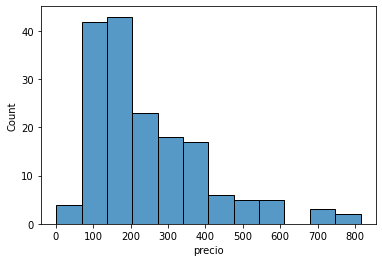

In [7]:
sns.histplot(df.precio)

<AxesSubplot:xlabel='metros', ylabel='Count'>

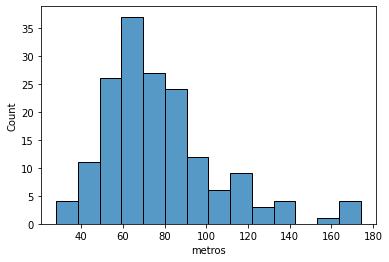

In [8]:
sns.histplot(df.metros)

/home/emilio/anaconda3/envs/clik/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='metros', ylabel='precio'>

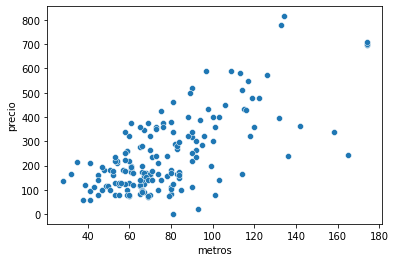

In [9]:
sns.scatterplot(df.metros, df.precio, hue)

In [3]:
columnas = ['precio_area', 'intext']
n_targets = 5
k = 3
# inds = [45, 56, 66, 77, 12]
# assert len(inds) == n_targets

dfs=[]
#comentario
for i in range(n_targets):
    target = df.sample(1)
    df_test = df.copy()
    df_test.drop(target.index, axis=0, inplace=True)
    # target = df.loc[inds[i]]
    # get top similar
    similar_df = get_top_similar(df_test,target, opciones, k)

    # etiquetar target
    target['is_target'] = 1
    similar_df['is_target'] = 0
        
    # contains 4 houses with 3 cols: columns and is_target
    df_all = pd.concat([target, similar_df])[columnas + ['is_target']]
    # give color
    df_all['group'] = i

    dfs.append(df_all)

df_groups = pd.concat(dfs)

In [4]:
df_groups

,precio_area,intext,is_target,group
uv,,,,
UV/2020/000031,864857.142857,3,1,0
UV/2020/000147,384158.333333,3,0,0
UV/2020/000048,460000.000000,3,0,0
UV/2020/000150,750625.000000,3,0,0
UV/2020/000255,NaN,3,1,1
UV/2020/000319,243468.888889,3,0,1
UV/2020/000244,NaN,3,0,1
UV/2021/000408,304999.000000,3,0,1
UV/2021/000367,159750.000000,3,1,2


<AxesSubplot:xlabel='precio_area', ylabel='intext'>

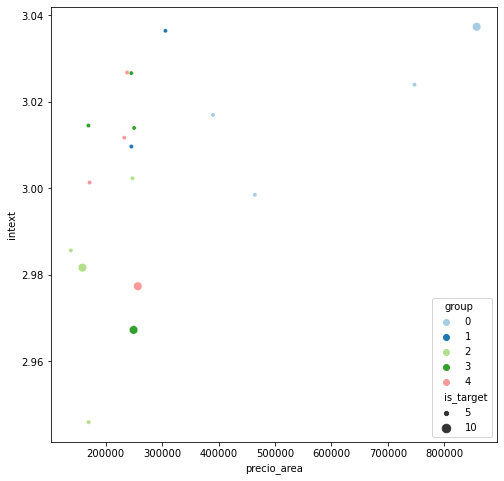

In [5]:
colores=['r','g','y','b','c']
fig=plt.gcf()
fig.set_size_inches(8,8)
#sns.set_palette("Paired")

def jitter(values):
    return values * np.random.normal(1,0.008,values.shape)

sns.scatterplot(x=jitter(df_groups[columnas[0]]), y=jitter(df_groups[columnas[1]]), size=5+5*df_groups.is_target, hue=df_groups.group, palette='Paired')

